<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-2-Regression/blob/master/Copy_of_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df = df.drop('Id',axis=1)

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

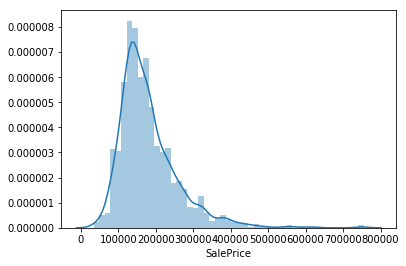

In [35]:
#bit of skew on sale price so let's transform this feature as log price
sns.distplot(df['SalePrice']);

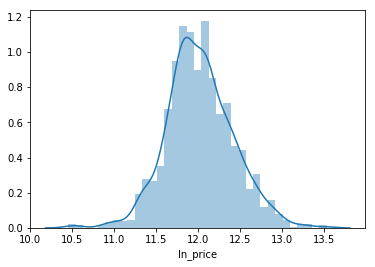

In [32]:
#much better
import numpy as np
df['ln_price'] = np.log(df['SalePrice'])
sns.distplot(df['ln_price']);

In [54]:
df_coded=df.copy()
for col in df_coded.columns:
  if df_coded[col].dtype=='O':
    df_coded[col] = pd.Categorical(df_coded[col])
    df_coded[col] = df_coded[col].cat.codes
df_coded['LotFrontage']=df_coded['LotFrontage'].fillna(0)
df_coded['MasVnrArea']=df_coded['MasVnrArea'].fillna(0)
df_coded['GarageYrBlt']=np.where(df_coded['GarageYrBlt'].isna()==True,df_coded['YearBuilt'],df_coded['GarageYrBlt'])
df_coded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln_price
0,60,3,65.0,8450,1,-1,3,3,0,4,...,-1,-1,-1,0,2,2008,8,4,208500,12.247694
1,20,3,80.0,9600,1,-1,3,3,0,2,...,-1,-1,-1,0,5,2007,8,4,181500,12.109011
2,60,3,68.0,11250,1,-1,0,3,0,4,...,-1,-1,-1,0,9,2008,8,4,223500,12.317167
3,70,3,60.0,9550,1,-1,0,3,0,0,...,-1,-1,-1,0,2,2006,8,0,140000,11.849398
4,60,3,84.0,14260,1,-1,0,3,0,2,...,-1,-1,-1,0,12,2008,8,4,250000,12.429216


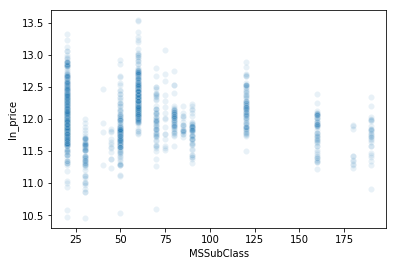

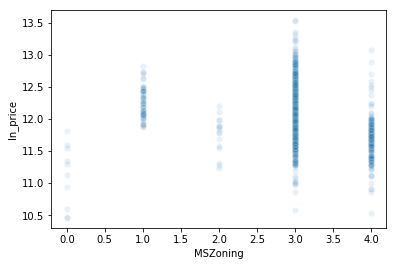

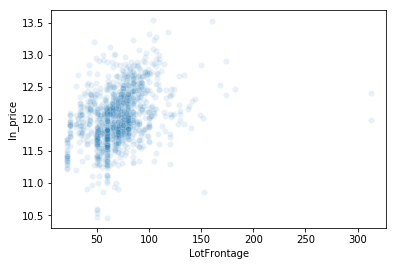

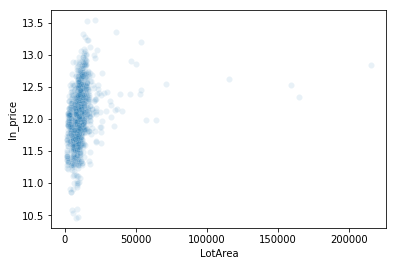

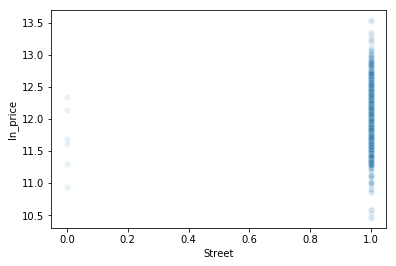

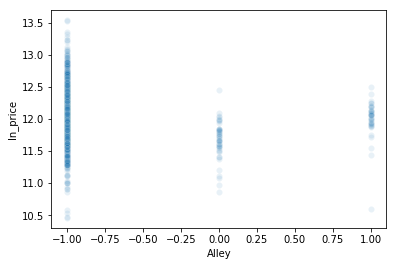

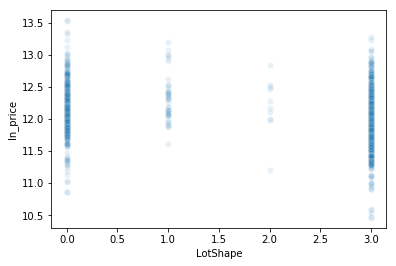

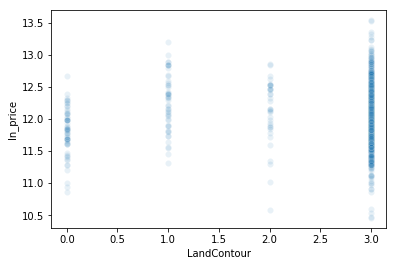

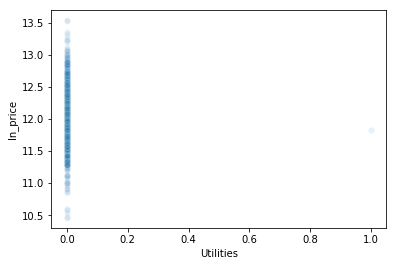

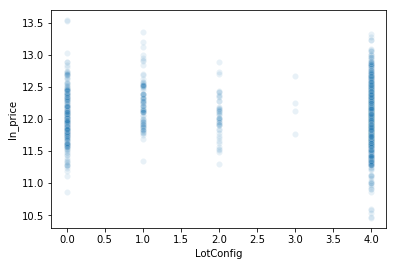

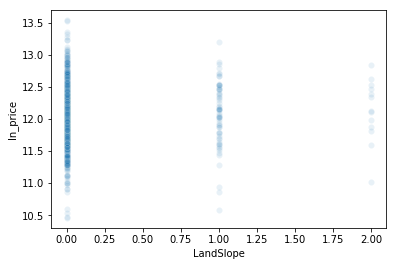

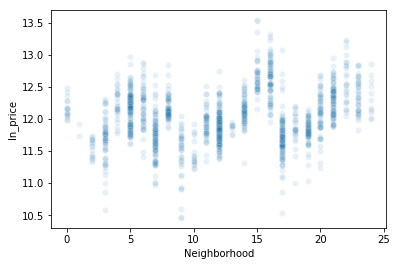

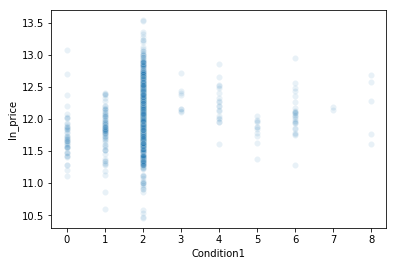

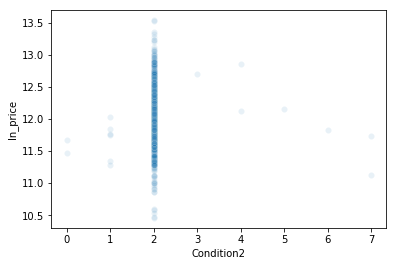

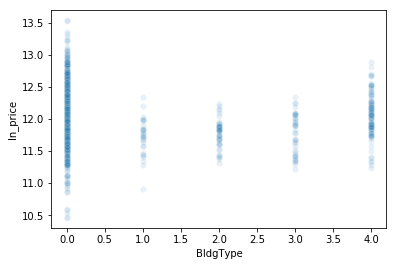

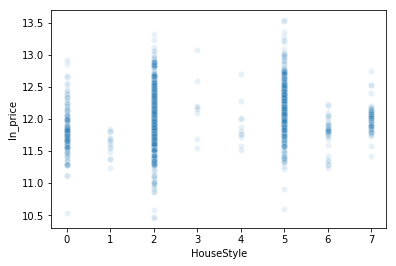

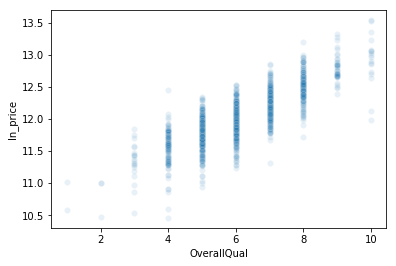

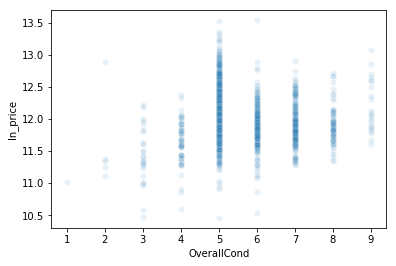

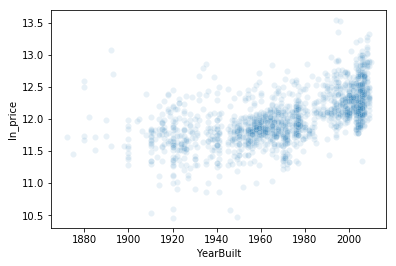

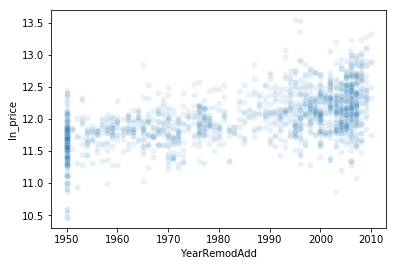

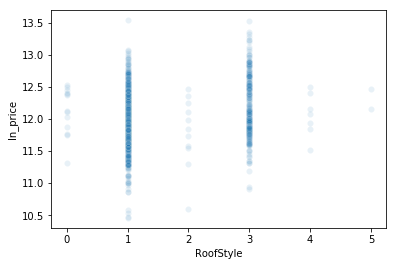

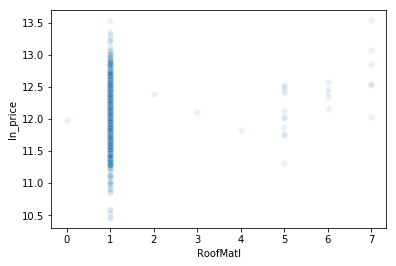

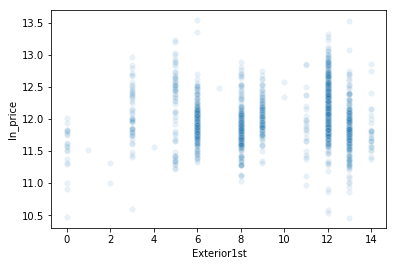

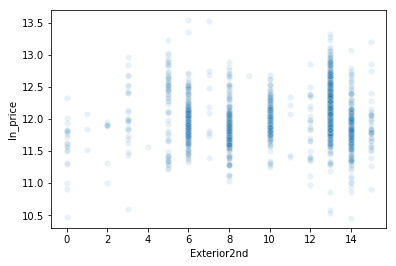

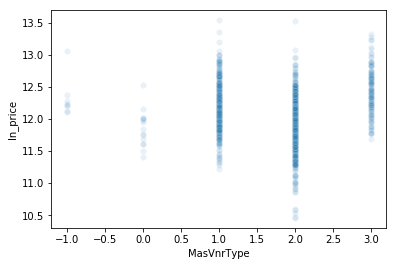

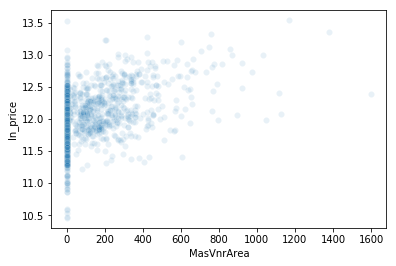

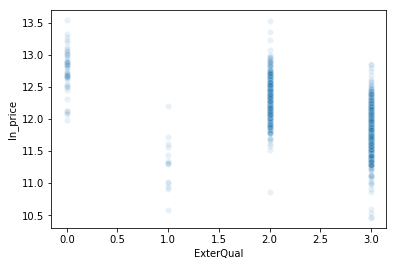

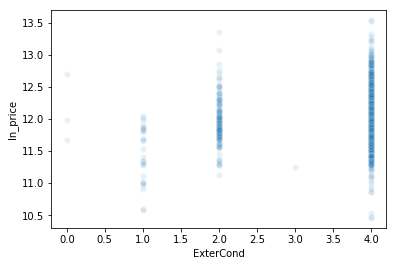

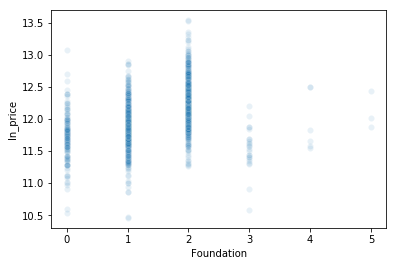

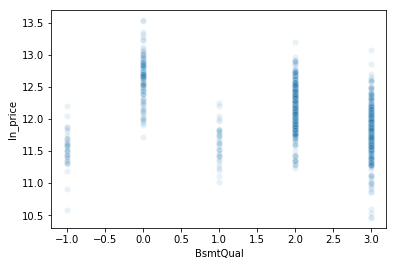

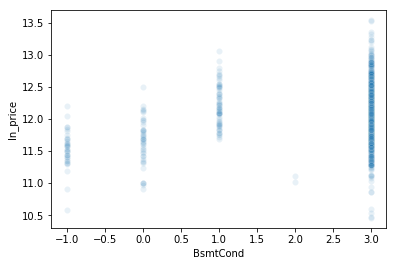

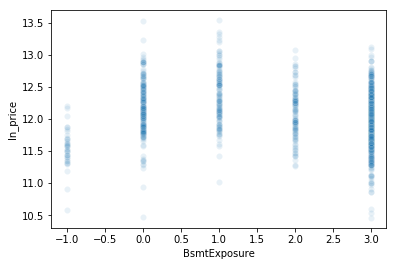

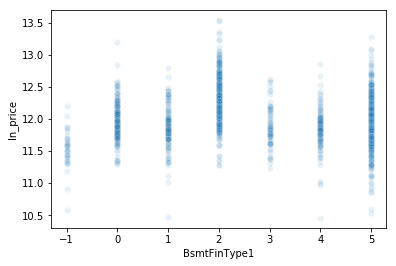

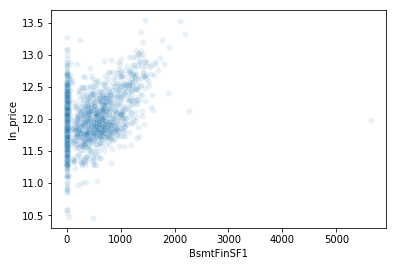

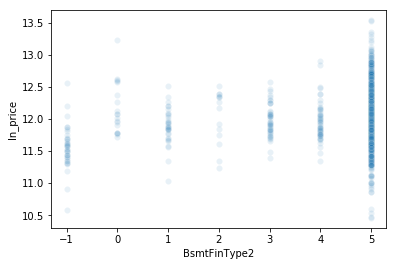

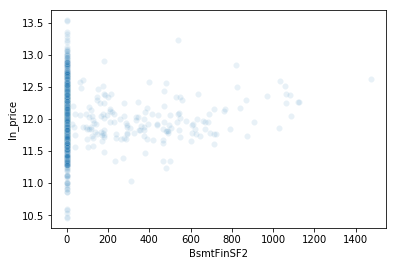

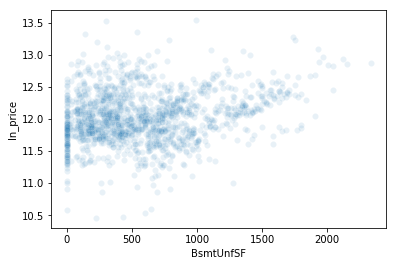

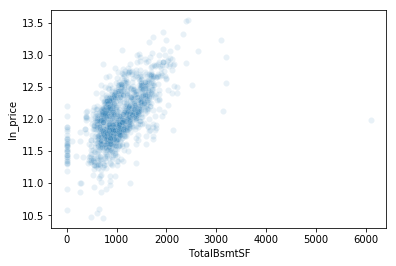

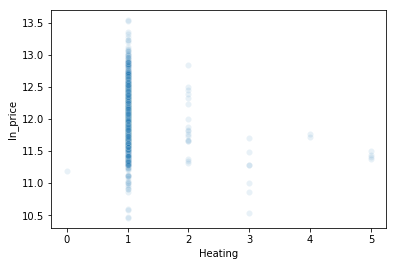

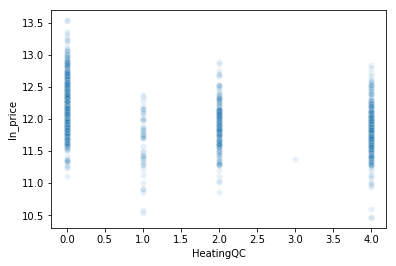

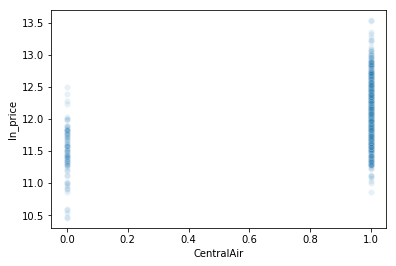

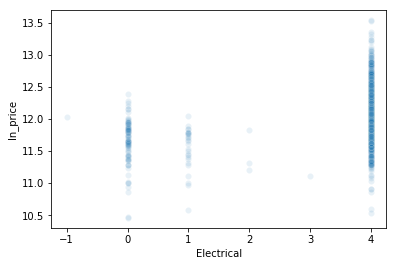

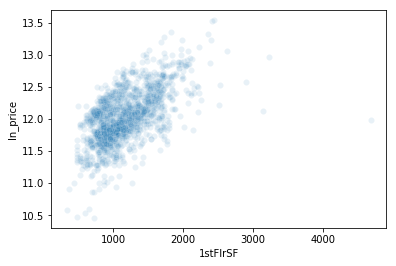

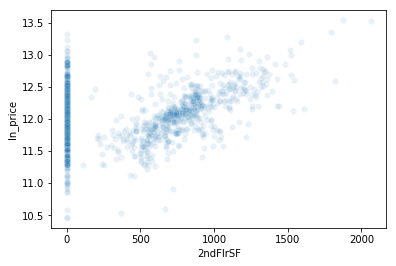

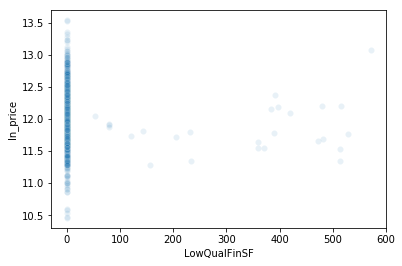

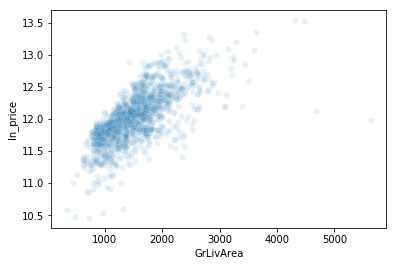

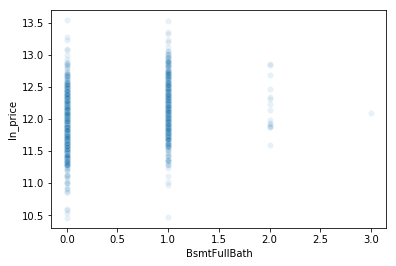

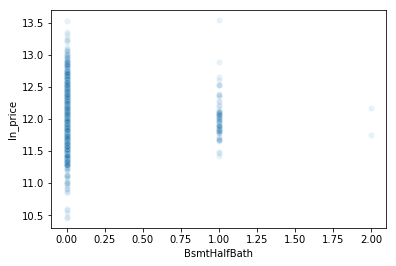

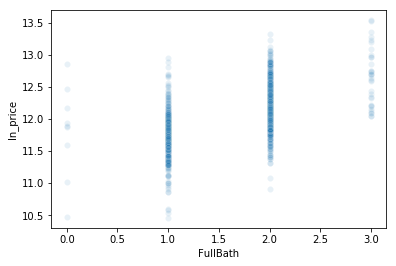

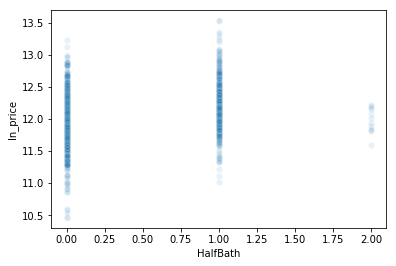

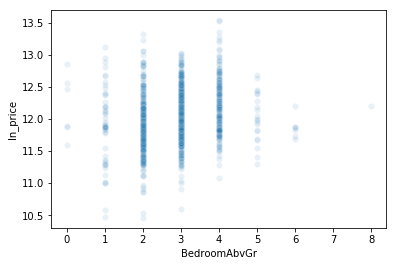

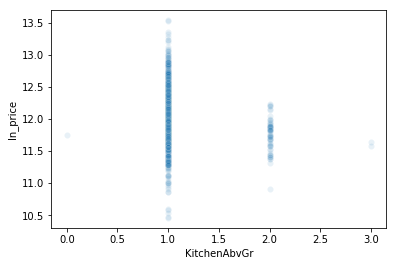

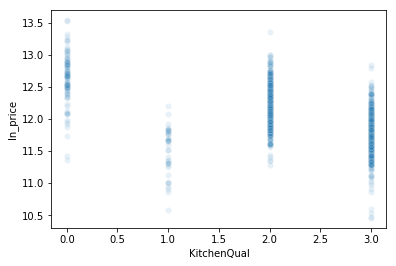

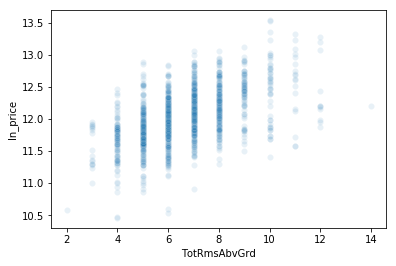

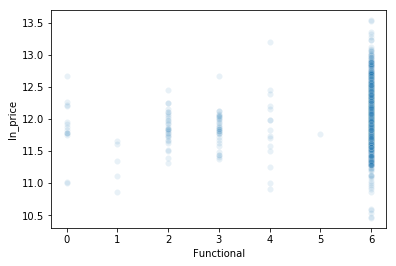

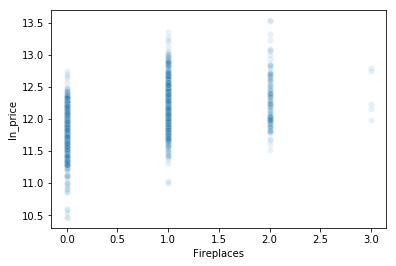

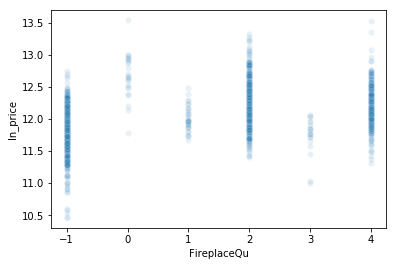

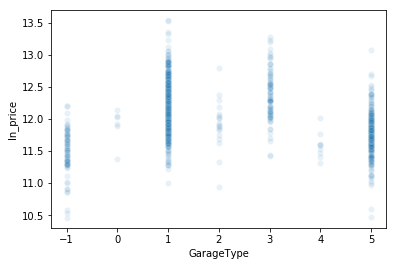

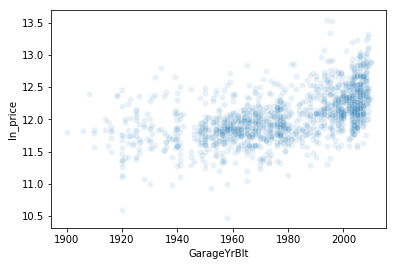

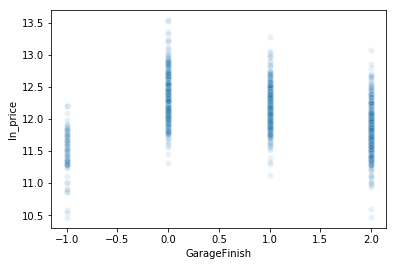

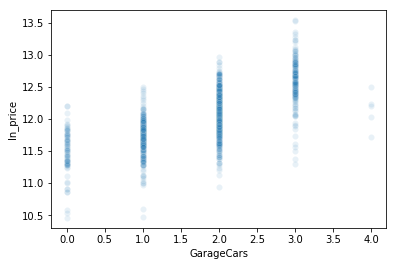

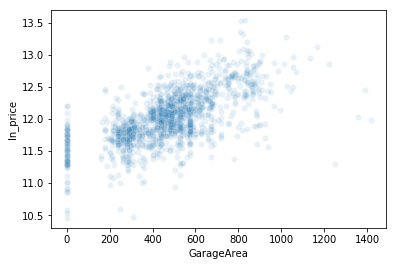

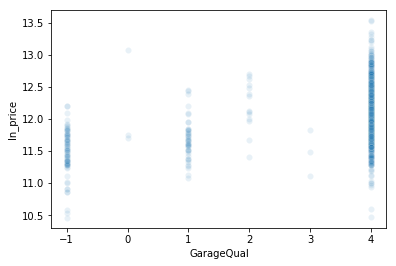

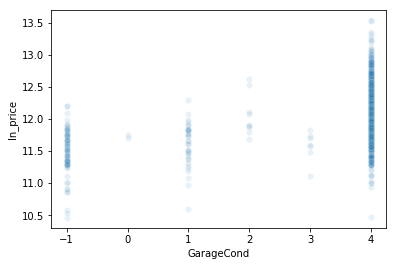

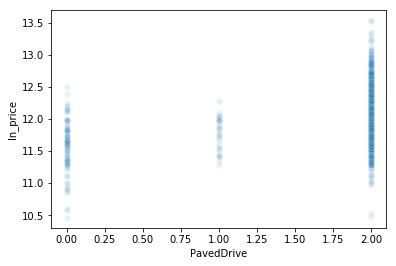

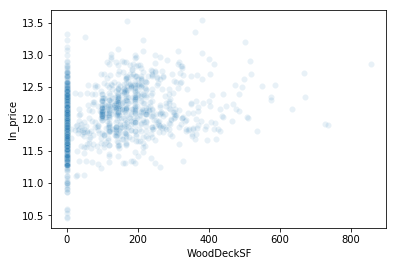

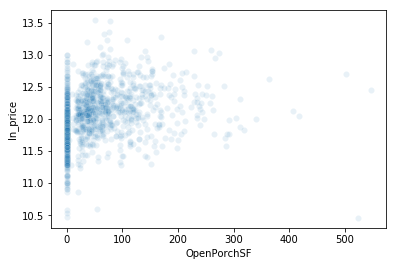

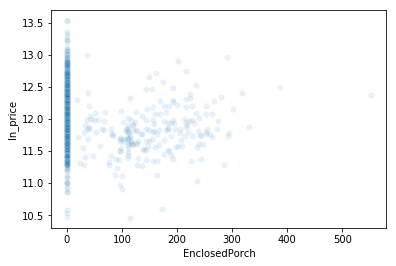

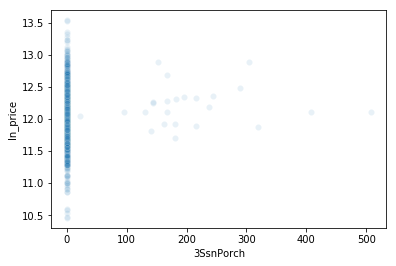

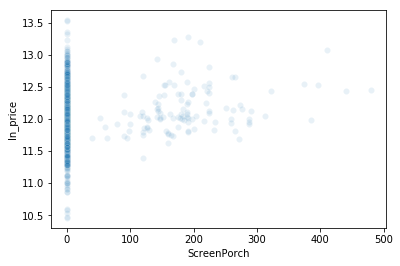

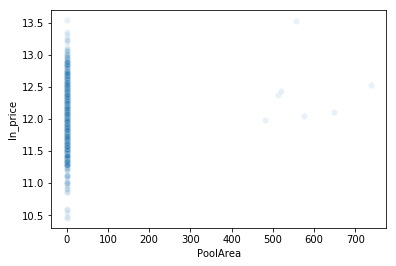

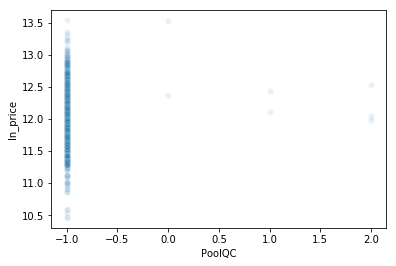

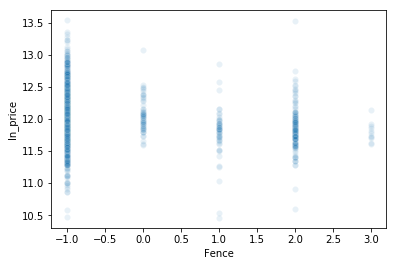

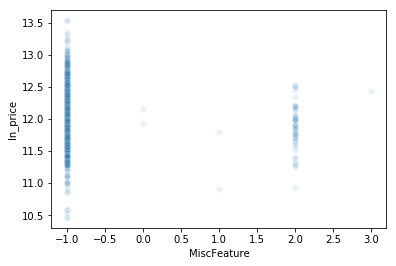

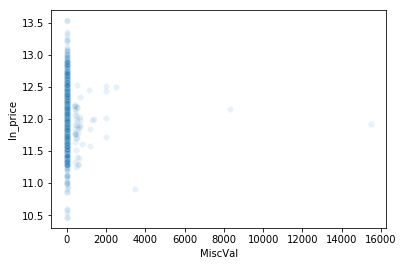

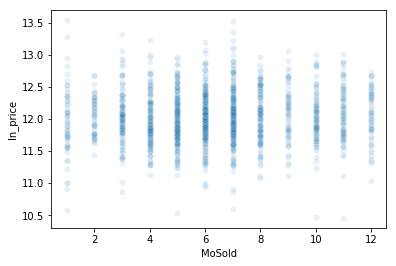

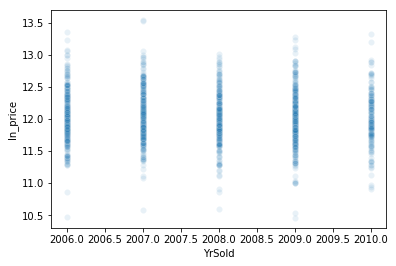

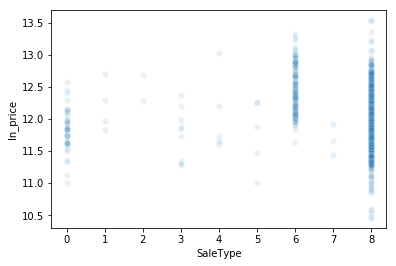

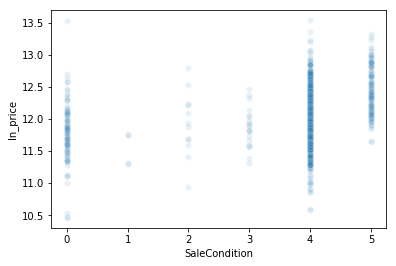

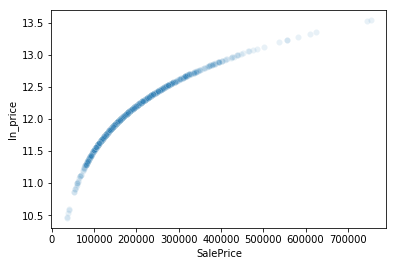

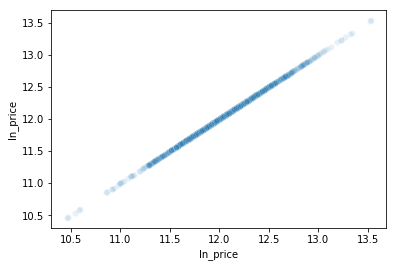

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
target = 'ln_price'
#numeric_columns = df.select_dtypes(include='number').columns
for feature in df_coded.columns:
    sns.scatterplot(x=feature, y=target, data=df_coded, alpha=0.1)
    plt.show()

In [43]:
#check if overall qual will make good poly feature
df_coded['OQ_sqrd']=df['OverallQual']**2
target = 'ln_price'
features = ['OverallQual', 'OQ_sqrd']
y = df_coded[target]
X = df_coded[features]

run_linear_model(df_coded[['OverallQual']], y)
run_linear_model(df_coded[['OQ_sqrd']], y)
run_linear_model(X, y)

Root Mean Squared Error 0.23109511377446032
R^2 Score 0.7138205628839367
Intercept 10.618043400398314
OverallQual    0.230759
Root Mean Squared Error 0.23565933882672108
R^2 Score 0.7024046033874409
Intercept 11.31759482401178
OQ_sqrd    0.018124
Root Mean Squared Error 0.23091829426672114
R^2 Score 0.714258328508559
Intercept 10.813010166475717
OverallQual    0.165270
OQ_sqrd        0.005234


In [74]:
#let's try it for all teh columns:
max_list=[]
for col in df_coded.columns:
  temp_df=df_coded.copy()
  temp_df['col_sqrd']=temp_df[col]**2
  temp_list=[[col],['col_sqrd'],[col,'col_sqrd']]
  t_list=[]
  for t in temp_list:
    rmse=run_linear_model(temp_df[t],temp_df['SalePrice'])
    t_list.append(rmse[0])
    #print(col,rmse)
  diff=t_list[0]-t_list[2]
  aaa = (col,round(diff,2))
  max_list.append(aaa)
max(max_list)

('ln_price', 21754.08)

In [76]:
#ignore ln_price.  let's use MSZoning and overall quality
max_list.sort(key=lambda x: x[1])
max_list[-10:]

[('BsmtFinType1', 4771.05),
 ('OverallQual', 5142.85),
 ('MasVnrType', 5182.32),
 ('SaleType', 5265.84),
 ('BsmtExposure', 5636.91),
 ('MSZoning', 5724.69),
 ('GarageType', 7064.97),
 ('2ndFlrSF', 7839.35),
 ('GarageFinish', 7928.26),
 ('ln_price', 21754.08)]

In [0]:
#two polynomial features
df_coded['OQ_sqrd']=df_coded['OverallQual']**2
df_coded['MSZoning']=df_coded['MSZoning']**2

In [0]:
def run_linear_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    #print('Root Mean Squared Error', rmse)
    #print('R^2 Score', r2)
    #print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    #print(coefficients.to_string())
    return rmse,r2


In [80]:
#engineered features
df_coded['age_when_sold']=df_coded['YrSold']-df_coded['YearBuilt']
df_coded['total_bath']=df_coded['BsmtFullBath']+0.5*df_coded['BsmtHalfBath']+df_coded['FullBath']+0.5*df_coded['HalfBath']


X_final=df_coded.copy().drop(['SalePrice','ln_price'],axis=1)
y_final=df_coded['ln_price']

run_linear_model(X_final, y_final)

(0.16068768982332965, 0.8616363171157893)

In [0]:
#here we get a log rmse of 0.16 and r2 of 0.86 which seems ok

In [99]:
df_coded['OverallQual'].min(),df_coded['OverallQual'].max()

(1, 10)

KeyError: ignored

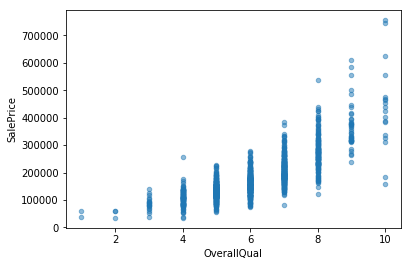

In [112]:
#i'm going to come back to this tomorrow as it got messy and i got tired
def polynomial_regression(degrees=2):
    
    # Make polynomial features
    feature = 'OverallQual'
    polynomial_features = []
    for degree in range(2, degrees+1):
        name = f'{feature} ** {degree}'
        df_coded[name] = df_coded[feature] ** degree
        polynomial_features.append(name)
    
    features = [feature] + polynomial_features
    target  = 'SalePrice'
    X = df_coded[features]
    y = df_coded[target]
    model = LinearRegression()
    model.fit(X, y)
    
    ax = df_coded.plot(x=feature, y=target, kind='scatter', alpha=0.5)
    
    mp=list(range(1,11))
    mdf=pd.DataFrame(mp)
    for degree in range(2,degrees+1):
      mdf[degree]=mdf[0]**degree
    #mdf.columns=['qual']
    mp_p=model.predict(mdf)
    #mdf['pred']=mp_p
    
    ax.plot(mdf[0], mdf[mp_p])
    #print((model.predict(X)))
    #print((df_coded[feature]))
    betas = [model.intercept_] + model.coef_.tolist()
    equation = ' + '.join(f'{beta}x**{i}' for i, beta in enumerate(betas))
    print(equation)
    print('R^2', model.score(X, y))
    
polynomial_regression(2)
  

In [110]:
mp=list(range(0,11))
mdf=pd.DataFrame(mp)
mdf

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [83]:
interact(polynomial_regression, degrees=(1,10))

interactive(children=(IntSlider(value=2, description='degrees', max=10, min=1), Output()), _dom_classes=('widg…

<function __main__.polynomial_regression>

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data